# Análise explanatória  (EDA)

*** Objetivos: ***

* Entender o que é e como aplicar um workflow 
* Entender o modelo, entender o conceito de métricas aplicar avaliação de regras de negócio.
* Aplicar análise explanatoria, técnicas de estatística, queryes e afins.
* Entendimento de modelos.
* Data handling.
* Modelo de dados (tratamento de data missing, outliers)
* Criação de apresentação de dados com jupyter


## Workflow - Engenharia de Software  

Para que haja um entendimento completo e um projeto organizado orienta-se seguir algum método de engenharia de software definindo um workflow, existens alguns workflows famosos ultilizados no mercado como por exemplo [Crisp-dm](https://www.kdnuggets.com/2014/10/crisp-dm-top-methodology-analytics-data-mining-data-science-projects.html) e o [Microsoft Workflow for Data Science](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/lifecycle-business-understanding) ambos os modelos são totalmente aplicáveis e ultilizados para o trabalho de um cientista de dados, tais técnicas são fundamentais para o trabalho em grupo. 
Nesse artigo ultilizaremos o Microsoft Workflow, que se baseia nos seguintes passos:

+ Business Understanding
+ Data Acquisition and Understanding
+ Modeling
+ Deployment
+ Customer Acceptance

![image.png](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/media/overview/tdsp-lifecycle2.png)

Fonte [Microsoft Data Science](https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/lifecycle-business-understanding)

*** 1 - Busness understanding ***

A parte de entendimento do negócio se baseia no entendimento do modelo, métricas e variáveis. Nessa fase estuda-se o modelo, define o problema a ser resolvido e as métricas ultilizadas para que seu resultado seja válido e impactante no negócio.


*** 2 Data acquisition and understanding *** 

Na aquisição dos dados o objetivo é agrupar os dados e desenvolver seu dataset tendo em vista a criação de um dataset limpo e de qualidade, essa parte do projeto é a mais trabalhosa principalmente pela função da limpagem dos dados, em casos onde o profissional trabalha com dados não estruturados essa parte do projeto pode levar até meses. 

Na fase de aquisição dos dados também é necessária a definição da arquitetura ultilizada no projeto, precisa-se ultilizar uma visão analítica e avaliar seu dataset e assim definir quantas pipelines você irá ultilizar, se o projeto ultilizara um cluster x ou y, se necessitara de uma arquitetura de clusterização como handop e etc. 

*** 3 Modeling *** 

Aqui na modelagem você deve determinar qual modelo de machine learning ou modelo estatístico ultilizado.
Uma das partes mais importantes nesse estágio é a separação do seu dataset em treino e teste, geralmente existem abordagens como 60-40 onde voce faz uma divisão em seu dataset com 60% treino e 40% teste até técnicas mais trabalhadas como walking forward algorithm que se encarrega de efetuar inúmeras divisões em seu modelo para facilitar a validação futura.

Nsse passo específico você pode seguir a seguinte abordagem

* *** Divida seu dataset *** como por exemplo uma divisão 60 - 40
* *** Treine inúmeros modelos *** Treine vários modelos de dados, teste inúmeros algorítmos.
* *** Teste  e valide os modelos *** Execute os testes com todos os modelos treinados, ultilize tecnicas como cross validation e A/B testing
* *** Determine a "melhor" solução ***  Escolha o algorítmo que representa os melhores resultados nos testes, os melhores modelos irão para produção. No estágio de produção monitore constantemente seus resultados, retire as métricas e avalie elas calmamente.

*** 4 Deployment *** 

No passo de desenvolvimento você vai montar o projeto para o usuario final, tenha criatividade e ultlize o melhor das técnicas de vizualização como:

+ Online websites
+ Spreadsheets
+ Dashboards
+ Line-of-business applications
+ Back-end applications

*** 5 Customer acceptance *** 

Agora você ja está terminando o projeto revise seu modelo, reveja todos os detalhes e principalmente *** garanta que você está entregando o que seu cliente realmente quer ***  e receba o feedback. Caso necessário reveja os passos anteriores.




#  Workflow, análise explanatória Medical Cost Personal Datasets

Para demostração ultiliza-se o [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance)  esse dataset é abordado no livro [Machine Learning with R by Brett Lantz](https://www.amazon.com.br/Machine-Learning-R-Brett-Lantz/dp/1782162143) e tais dados são de domínio publico, esse dataset e outros do livro se encontram pada download [aqui](https://github.com/stedy/Machine-Learning-with-R-datasets).

*** 1 - Busness understanding ***

Com esse dataset são possíveis inúmeras análises estatísticas e permite uma análise explanatória ideal, também pode ser ultilizada com machine learning para predição de custo, regressões lineares e afins.

Colunas 
- age: Idade do beneficiário.

- sex: Gênero explicito como: female, male.

- bmi: Do inglês Body mass index, o índice de massa corporal, é calculado como:  (peso(kg) / altura(m) ^ 2) e os valores ideais estão entre,  18.5 a 24.9.

- children: Número de crianças cobertas pelo plano de saúde.

- smoker: Fumante ou não.

- region: Região dos EUA onde o beneficiário vive, northeast, southeast, southwest, northwest.

- charges: Custo pago pelo plano de  saúde.

Entendimento do modelo:

*** Questionar sobre ***  
+ "O que posso extrair com esses dados?"
+ "O quais dados posso cruzar?"
+ "Quão importante é essa pesquisa?"
+ "Quão impactante é essa pesquisa?"

*** 2 Data acquisition and understanding ***

*** 1 - Limpeza dos dados - tratando missing data ***
No dataset foram inseridos alguns campos Nan e campos com valores em branco o primeiro passo após o download do dataset e carregar os dados  é remover tais campos pois eles contém informações inválidas. No nosso caso faremos o descarte total das linhas.

*** Obs 2: *** A partir de agora ultilizaremos o python. Considerando que você ja tenha lido a [aula 1](https://github.com/araramakerspace/CursoDataScience/blob/master/Aula1-pandas%2Bmatplot/aula1.ipynb)


*** Obs 2: *** O pandas dedicou uma pagina exclusiva para tratamento de data missing [aqui](https://pandas.pydata.org/pandas-docs/stable/missing_data.html)

Primeiro executamos o metodo head() do pandas para mostrar os primeiros elementos em seguida o método isna() que verifica as dataMissing e retornam verdadeiro ou falso





In [90]:
import pandas as pd #biblioteca para manupular os dataframes
import matplotlib.pyplot as plt #biblioteca para gráficos
import seaborn as sns  #biblioteca para gráficos
import numpy as np #biblioteca algebra linear

#habilita iteração com os gráficos
# %matplotlib notebook

%matplotlib inline

df = pd.read_csv("insurance.csv")

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.9,0,yes,NaN,16884.92400
1,19.0,female,27.9,0,yes,southwest,16884.92400
2,18.0,male,33.77,1,no,southeast,1725.55230
3,NaN,male,33.77,1,no,southeast,1725.55230
4,28.0,male,33,3,no,southeast,4449.46200
5,28.0,male,33,3,no,NaN,4449.46200
6,33.0,male,22.705,0,no,northwest,21984.47061
7,32.0,male,28.88,0,no,northwest,3866.85520
8,32.0,male,NaN,0,no,NaN,3866.85520
9,31.0,female,25.74,0,no,southeast,3756.62160


In [106]:
#df.isna()

*** Executamos o comando shape para verificar quantas linhas temos antes da remoção  *** 

In [107]:
df.shape #verificar  o numero de linhas e colunas

(1339, 8)

*** Para remover as datas missing ultiliza-se o comando df.dropna() para apagar as linhas NaN*** 

Outros argumentos para dropna()
* df.dropna()     #apaga as linhas que possuem Nan
* df.dropna(how='all')     #apaga somente as colunas em que todos os valores são NaN
* df.dropna(thresh=2)   #Apaga coluna somente se houverem duas ocorrencias de NaN
* df.dropna(subset=[1])   #Apagar somente uma coluna em específico


In [108]:
df = df.dropna()

*** Executamos novamente shape para verificar o valor pós execução. Constatamos que 6 linhas foram excluidas *** 

In [109]:
df.shape

(1339, 8)

### Como aprendemos na aula 1 o primeiro passo é usar o método describe para obter um resumo estatístico e verificar ocorrência de outliers


In [110]:
df.describe()

,age,children,charges
count,1339.000000,1339.000000,1339.000000
mean,39.212099,1.094847,13266.665855
std,14.045936,1.205045,12106.265345
min,18.000000,0.000000,1121.873900
25%,27.000000,0.000000,4742.306100
50%,39.000000,1.000000,9377.904700
75%,51.000000,2.000000,16622.107580
max,64.000000,5.000000,63770.428010


## Tipos de variáveis 

Para realizar análises mais sólidas um passo importante é a classificação de variáveis, pois tecnicas como regressão linear e outras não são aplicáveis em variáveis categóricas.

* *** Variável categórica ***
As variáveis categóricas contêm um número finito de categorias ou grupos distintos. Os dados categóricos podem não ter uma ordem lógica. Por exemplo, os preditores categóricos incluem gênero, tipo de material e método de pagamento.
* *** Variável discreta ***
Variáveis discretas são variáveis numéricas que têm um número contável de valores entre quaisquer dois valores. Uma variável discreta é sempre numérica. Por exemplo, o número de reclamações de clientes ou o número de falhas ou defeitos.
* *** Variável contínua ***
Variáveis contínuas são variáveis numéricas que têm um número infinito de valores entre dois valores quaisquer. Uma variável contínua pode ser numérica ou de data/hora. Por exemplo, o comprimento de uma peça ou a data e hora em que um pagamento é recebido.

fonte [minitab](https://support.minitab.com/pt-br/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/)


Nossas variáveis categóricas são sex, smoker e region, para deixar isso explícido ao pandas ultiliza-se o método Categorical.


In [111]:
df['sex'] = pd.Categorical(df['sex'])
df['smoker'] = pd.Categorical(df['smoker'])
df['region'] = pd.Categorical(df['region'])

### Para entender melhor nossos dados começamos a plotar algumas informações relevantes

# Distribuição Regional

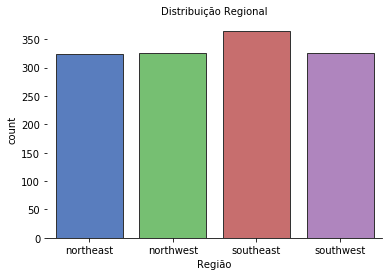

In [112]:
f,ax = plt.subplots()
sns.countplot(x='region', data=df, palette="muted",orient='v',ax=ax,edgecolor='0.2')
ax.set_xlabel("Região", fontsize=10)
ax.set_title("Distribuição Regional", fontsize=10)
x_axis = ax.axes.get_yaxis().set_visible(True)
sns.despine(left=True)
plt.show()

## Distribuição por faixa etária

Para realizar a distribuição por faixa etária o ideal é a construção de dois gráficos, idade e a classificação por faixa etária.

O padrão brasileiro de distribuição de idade disponível [aqui](https://pt.wikipedia.org/wiki/Predefini%C3%A7%C3%A3o:Faixas_et%C3%A1rias_do_Brasill) onde:

Algumas modificações são seguidas no nosso modelo pois as crianças já possúem uma coluna própria por entrarem como dependentes no plano de saúde. Nós usaremos o padrão Americano pois nossos dados são dos EUA.

+ Adolescente: até 17
+ Adulto-Jovem: 17-29
+ Adulto: 35-50
+ Idosos: acima de 65


Abaixo um exemplo de como realizar o mesmo:

In [113]:
#Criando coluna de categoria de idade
cut_points = [17,20,35,50,65]
label_names = ['Adol',"Adulto Jovem","Adulto","Idoso"]

#criação do plot 1 
df["age_category"] = pd.cut(df["age"],cut_points,labels=label_names) #cria coluna no da

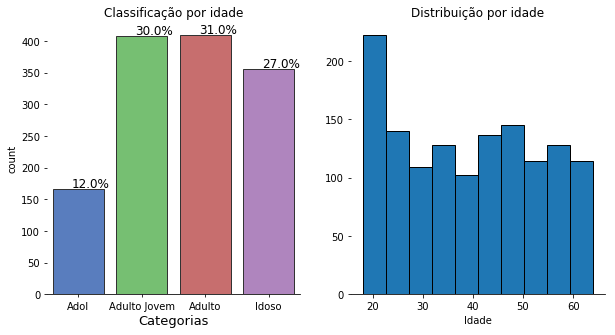

In [114]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
#cria o gráfico 1
sns.countplot(x='age_category',data=df,palette='muted',orient='v',ax=ax1,edgecolor='0.2')

#Calcula a porcentagem dos valores
for i in ax1.patches: 
    ax1.text(i.get_x()+0.3, i.get_height()+3, \
            str(round((i.get_height()/df.age_category.shape[0])*100))+'%', fontsize=12,
                color='black') 
    
#cria plot 2 indicando a idade com 10 divisões
ax2.hist('age', bins=10,data=df, edgecolor='black')


ax1.set_xlabel("Categorias", fontsize=13)
ax1.tick_params(length=3,labelcolor='black')
ax1.set_title("Classificação por idade")

ax2.set_xlabel('Idade')
ax2.set_title('Distribuição por idade')

x_axis = ax1.axes.get_yaxis().set_visible(True)

f.subplots_adjust()
sns.despine(left=True)
plt.show()

# Cruzando dados - Data Handling

Para ficar mais interessante cruzamos os dados obtidos anteriormente.

Cria-se a função distr_genero que recebe como argumento o parametro do dataframe que desejamos separar em função do gênero (***nesse caso variáveis categóricas***), no caso age_category (idade). Dessa forma pode-se reaproveitar a função para plotar outras características em função do gênero.

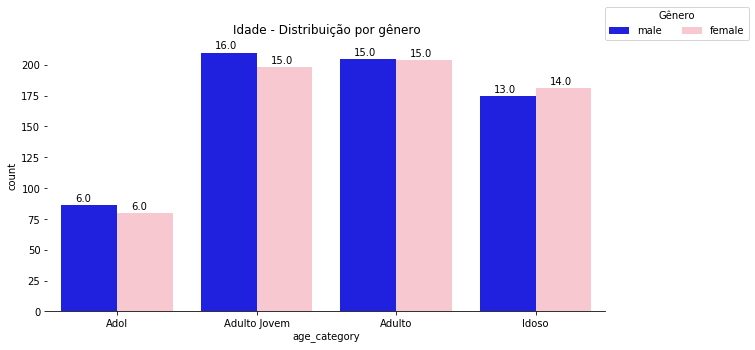

In [115]:
def distr_genero(x_val,title):
    f,ax = plt.subplots(figsize=(10,5))
    
    sns.countplot(x=x_val, data=df, palette=['blue','pink'],hue='sex',hue_order=['male','female'])
    
    for i in ax.patches:
        ax.text(i.get_x()+0.1, i.get_height()+3, \
                str(round((i.get_height()/df.region.shape[0])*100))) 
    
    ax.set_title(title +' Distribuição por gênero')

    ax.legend(loc=[1,1],title='Gênero',ncol=2)
    sns.despine(left=True)
    return plt.show()

distr_genero('age_category','Idade -')


***Esse gráfico abre espaço para discussão, porque temos um número maior de adolescentes e adultos do sexo masculino enquanto o número maior de idosos é feminino?***

#### Reaproveitando a função para cruzar o gênero com a localização para sabermos aonde se encontram a maior concentração de homens e mulheres

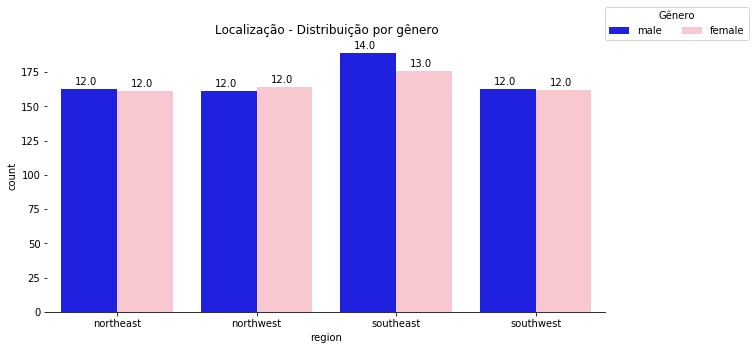

In [116]:
distr_genero('region','Localização -')

#### Reaproveitamos novamente a função criada para separar entre fumantes e não fumantes por gênero

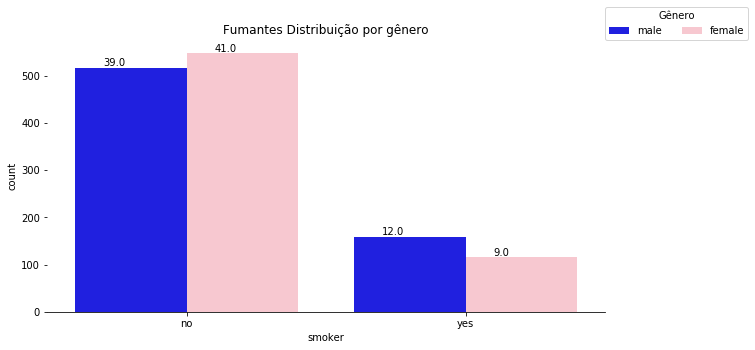

In [117]:
distr_genero('smoker','Fumantes')

***A análise desse gráfico mostra que a maioria dos fumantes são do sexo masculino, isso pode ter a ver com o primeiro gráfico? ***

## Vamos estudar mais sobre o BMI

BMI ou indíce de massa corporal

# Correlacionando os dados






guia (---(coisa gabs) --- IGNORAR O ESCRITO NESSE BLOCO [RASCUNHO])
- Discuções e entendimento de modelos de negócio 
- Análises explanatórias e estatística.
- Entendimento de modelos
- Data handling 
- Modelo de dados (tratamento de data missing, outliers)
- Modelos estatísticos
- Criação de apresentação de dados com jupyter

dataset da aula [gastos medicos](https://www.kaggle.com/mirichoi0218/insurance)


leitura adicional (análise estatística, estatística aplicada):
https://www.kaggle.com/janiobachmann/statistical-analysis-a-frequentist-approach


ordem
*** uns 3 slides de teoria, seguir a análise explanatoria seguindo o workflow da microsoft (claro reduzido) *** 
- Microsoft Workflow para data Science -> explicar como funciona o metodo do workflow (engenharia de software) ver [aqui] (https://docs.microsoft.com/enus/azure/machine-learning/team-data-science-process/overview)
                                                                                      
- Discuções e entendimento de modelos de negócio Falar de como aplicar as metricas, dos desafios de escolher as melhores metricas no nosso exemplo ficara bem claro

- analise explanatoria completa

Realizar uma analise explanatoria completa explicanto todos os conceitos em paralelo, 







